<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>Notebook investigating diaSources that are missing from the APDB</b> <br>
Contact author: Ian Sullivan<br>
Last verified to run: 12 January 2024<br>
LSST Science Piplines version: d_2023_12_12 and d_2024_01_12<br>
Run with a local ap_verify run of ap_verify_ci_hits2015

## Run details

* Used daily `d_2024_01_12` for all processing
* No local branches
* Run locally

### 1. Main package imports

In [2]:
import os
import importlib
import pprint
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline

import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
import lsst.afw.display as afwDisplay
import lsst.geom

import lsst.daf.butler as dafButler
import lsst.pipe.base
from astropy.table import Table

In [3]:
!eups list analysis_ap

   LOCAL:/Users/sullivan/LSST/code/build/analysis_ap 	setup


In [4]:
from lsst.analysis.ap import apdb
from lsst.analysis.ap import legacyApdbUtils as utils
from lsst.analysis.ap import legacyPlotUtils as plac
from lsst.analysis.ap import nb_utils

In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

importlib.reload(utils)

<module 'lsst.analysis.ap.legacyApdbUtils' from '/Users/sullivan/LSST/code/build/analysis_ap/python/lsst/analysis/ap/legacyApdbUtils.py'>

### 2. Data access config

In [6]:
!ls "../../ap_verify_output/tickets/DM-42483"

alerts         association.db config         pipelines      repo


In [7]:
repo = '../../ap_verify_output/tickets/DM-42483/repo'
collections = 'ap_verify-output'
instrument = 'DECam'
skymap = 'decam_rings_v1'

butler = dafButler.Butler(repo, collections=collections)

dbType='sqlite'
dbName = "../../ap_verify_output/tickets/DM-42483/association.db"

reader = apdb.ApdbSqliteQuery(dbName, butler=butler, instrument='DECam')

In [8]:
len(reader._tables)

5

In [9]:
default_run = {
    'repo': repo,
    'collections': collections,
    'instrument': instrument,
    'skymap': skymap,
    'butler': butler,
    'dbType': dbType,
    'dbName': dbName,
    'reader': reader
}

In [10]:
default_run['run_name'] = 'APDB'

## A. Analysis of Sources

### 3. Number of detections
Now loading the tables to compare among them

In [11]:
default_run['robjTable'] = default_run['reader'].load_objects()
default_run['rsrcTable'] = default_run['reader'].load_sources()

Look at how many objects and sources we picked right from the reader

In [12]:
n_objs = pd.DataFrame()

In [13]:
n_objs.loc['APDB', 'n_rdiasrc'] = len(default_run['rsrcTable'])
n_objs.loc['APDB', 'n_rdiaobj'] = len(default_run['robjTable'])

In [14]:
n_objs

,n_rdiasrc,n_rdiaobj
APDB,1132.0,968.0


In [15]:
test_table2 = default_run['reader'].load_sources()

In [16]:
object_columns = ['diaObjectId', 'ra', 'dec', 'nDiaSources', 'g_psfFluxMean', 
                  'r_psfFluxMean', 'i_psfFluxMean', 'z_psfFluxMean', 'y_psfFluxMean',
                  'validityEnd', 'flags']

In [17]:
source_columns = ['diaSourceId', 'diaObjectId', 'ra', 'dec', 'ccdVisitId', 'midpointMjdTai',
                  'apFlux', 'psfFlux', 'apFluxErr', 'psfFluxErr', 'scienceFlux', 'scienceFluxErr',
                  'snr', 'x', 'y', 'ixxPSF', 'iyyPSF', 'ixyPSF', 'flags', 'reliability', 'band',
                  'visit', 'detector', 'instrument']

In [18]:
table1 = default_run['robjTable'][default_run['robjTable'].validityEnd.isnull()]

Inspect the columns of the object table

In [19]:
for c in table1.columns:
    print(c)

diaObjectId
validityStart
validityEnd
ra
raErr
dec
decErr
ra_dec_Cov
radecMjdTai
pmRa
pmRaErr
pmDec
pmDecErr
parallax
parallaxErr
pmRa_pmDec_Cov
pmRa_parallax_Cov
pmDec_parallax_Cov
pmParallaxLnL
pmParallaxChi2
pmParallaxNdata
u_psfFluxMean
u_psfFluxMeanErr
u_psfFluxSigma
u_psfFluxChi2
u_psfFluxNdata
u_fpFluxMean
u_fpFluxMeanErr
u_fpFluxSigma
g_psfFluxMean
g_psfFluxMeanErr
g_psfFluxSigma
g_psfFluxChi2
g_psfFluxNdata
g_fpFluxMean
g_fpFluxMeanErr
g_fpFluxSigma
r_psfFluxMean
r_psfFluxMeanErr
r_psfFluxSigma
r_psfFluxChi2
r_psfFluxNdata
r_fpFluxMean
r_fpFluxMeanErr
r_fpFluxSigma
i_psfFluxMean
i_psfFluxMeanErr
i_psfFluxSigma
i_psfFluxChi2
i_psfFluxNdata
i_fpFluxMean
i_fpFluxMeanErr
i_fpFluxSigma
z_psfFluxMean
z_psfFluxMeanErr
z_psfFluxSigma
z_psfFluxChi2
z_psfFluxNdata
z_fpFluxMean
z_fpFluxMeanErr
z_fpFluxSigma
y_psfFluxMean
y_psfFluxMeanErr
y_psfFluxSigma
y_psfFluxChi2
y_psfFluxNdata
y_fpFluxMean
y_fpFluxMeanErr
y_fpFluxSigma
u_lcPeriodic
g_lcPeriodic
r_lcPeriodic
i_lcPeriodic
z_lcPeriodic


Inspect the columns of the source table

In [20]:
table2 = default_run['rsrcTable']

In [21]:
for c in table2.columns:
    print(c)

diaSourceId
ccdVisitId
diaObjectId
ssObjectId
parentDiaSourceId
ssObjectReassocTime
midpointMjdTai
ra
raErr
dec
decErr
ra_dec_Cov
x
xErr
y
yErr
x_y_Cov
apFlux
apFluxErr
snr
psfFlux
psfFluxErr
psfRa
psfRaErr
psfDec
psfDecErr
psfFlux_psfRa_Cov
psfFlux_psfDec_Cov
psfRa_psfDec_Cov
psfLnL
psfChi2
psfNdata
trailFlux
trailFluxErr
trailRa
trailRaErr
trailDec
trailDecErr
trailLength
trailLengthErr
trailAngle
trailAngleErr
trailFlux_trailRa_Cov
trailFlux_trailDec_Cov
trailFlux_trailLength_Cov
trailFlux_trailAngle_Cov
trailRa_trailDec_Cov
trailRa_trailLength_Cov
trailRa_trailAngle_Cov
trailDec_trailLength_Cov
trailDec_trailAngle_Cov
trailLength_trailAngle_Cov
trailLnL
trailChi2
trailNdata
dipoleMeanFlux
dipoleMeanFluxErr
dipoleFluxDiff
dipoleFluxDiffErr
dipoleRa
dipoleRaErr
dipoleDec
dipoleDecErr
dipoleLength
dipoleLengthErr
dipoleAngle
dipoleAngleErr
dipoleMeanFlux_dipoleFluxDiff_Cov
dipoleMeanFlux_dipoleRa_Cov
dipoleMeanFlux_dipoleDec_Cov
dipoleMeanFlux_dipoleLength_Cov
dipoleMeanFlux_dipoleAng

In [22]:
ccdVisitIds = set(table2['ccdVisitId'])

In [137]:
ccdVisitIds

{41137156, 41137160, 41142005, 41142010, 41980205, 41980210}

Now filter the objects which are not valid and pick the useful columns.

In [24]:
default_run['objTable'] = default_run['robjTable'][default_run['robjTable'].validityEnd.isnull()][object_columns]
default_run['srcTable'] = default_run['rsrcTable'][source_columns]

In [25]:
n_objs.loc['APDB', 'n_diasrc'] = len(default_run['srcTable'])
n_objs.loc['APDB', 'n_diaobj'] = len(default_run['objTable'])

In [138]:
n_objs

,n_rdiasrc,n_rdiaobj,n_diasrc,n_diaobj,n_good_diaobj,n_good_diasrc
APDB,1132.0,968.0,1132.0,968.0,422.0,537.0


Note that no objects were filtered out by the above check 

### 4. Flags 
Loading up the flag tables now

In [27]:
badFlagList = [
    'base_PixelFlags_flag_bad',
    'base_PixelFlags_flag_suspect',
    'base_PixelFlags_flag_saturatedCenter',
    'base_PixelFlags_flag_interpolated',
    'base_PixelFlags_flag_interpolatedCenter',
    'base_PixelFlags_flag_edge',
    'base_PixelFlags_flag_offimage',
    # 'base_PixelFlags_flag_interpolatedCenterAll',
    # 'base_PixelFlags_flag_saturatedCenterAll',
    ]

In [28]:
from lsst.ap.association import UnpackApdbFlags, TransformDiaSourceCatalogConfig

In [29]:
import functools
import operator

In [30]:
config = TransformDiaSourceCatalogConfig()
unpacker = UnpackApdbFlags(config.flagMap, 'DiaSource')

In [31]:
def add_flag_tables(run_dict, badFlagList):
    """
    Unpack the flags and add the resulting tables to the run dictionary
    """
    run_dict['flagValues'] = unpacker.unpack(run_dict['srcTable']['flags'], 'flags')
    run_dict['flagTable'] = pd.DataFrame(run_dict['flagValues'], index=run_dict['srcTable'].index)

    run_dict['srcTableFlags'] = pd.merge(run_dict['srcTable'], run_dict['flagTable'], left_index=True, right_index=True)
    
    badFlags = [run_dict['srcTableFlags'][flag] for flag in badFlagList]
    flagFilter = functools.reduce(operator.or_, badFlags)
    noFlagFilter = ~flagFilter

    run_dict['goodSrc'] = run_dict['srcTableFlags'].loc[noFlagFilter]

    run_dict['goodObjIds'] = set(run_dict['srcTableFlags'].loc[noFlagFilter, 'diaObjectId'])

    run_dict['goodObj'] = run_dict['objTable'].loc[run_dict['objTable']['diaObjectId'].isin(run_dict['goodObjIds'])]
    
    return flagFilter, noFlagFilter

In [32]:
flagFilter, noFlagFilter = add_flag_tables(default_run, badFlagList)
n_objs.loc['APDB', 'n_good_diaobj'] = len(default_run['goodObj'])
n_objs.loc['APDB', 'n_good_diasrc'] = len(default_run['goodSrc'])

In [139]:
n_objs

,n_rdiasrc,n_rdiaobj,n_diasrc,n_diaobj,n_good_diaobj,n_good_diasrc
APDB,1132.0,968.0,1132.0,968.0,422.0,537.0


Text(0, 0.5, 'N')

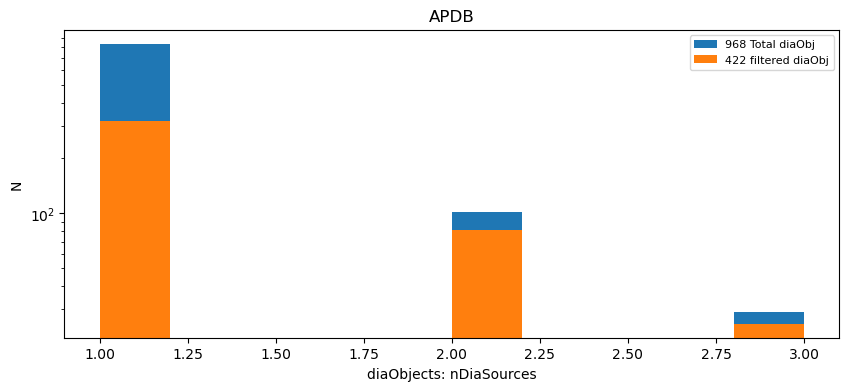

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=True)
for i_run, run_dict in enumerate([default_run]):
    #plt.figure(figsize=(12, 8))
    ax = axes

    ax.hist(run_dict['objTable'].nDiaSources, log=True, label=f"{len(run_dict['objTable'])} Total diaObj")
    #plt.xlabel('diaObjects: nDiaSources')
    #plt.legend(loc='best')

    ax.hist(run_dict['goodObj'].nDiaSources, log=True, label=f"{len(run_dict['goodObj'])} filtered diaObj")
    ax.set_xlabel('diaObjects: nDiaSources')
    ax.legend(loc='best', fontsize=8)
    ax.set_title(run_dict['run_name'])
axes.set_ylabel('N')

## 4.1 Real-bogus reliability scores

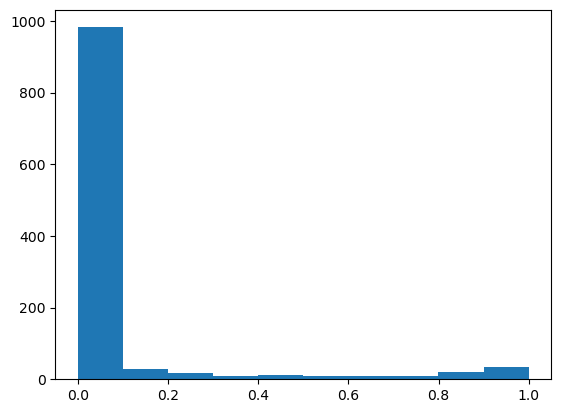

In [35]:
default_hist = plt.hist(default_run['srcTable']['reliability'])

In [36]:
reliability_table = pd.DataFrame()

In [37]:
reliability_table['reliability'] = np.around(default_hist[1][:-1], 3)

In [38]:
reliability_table[default_run['run_name']] = default_hist[0]
# reliability_table[test_run['run_name']] = test_hist[0]

In [39]:
reliability_table

,reliability,APDB
0,0.0,982.0
1,0.1,29.0
2,0.2,18.0
3,0.3,10.0
4,0.4,11.0
5,0.5,9.0
6,0.6,9.0
7,0.7,10.0
8,0.8,19.0
9,0.9,35.0


In [40]:
print(default_hist[1][5])
print(np.sum(default_hist[0][5:]))
# print(np.sum(test_hist[0][5:]))

0.49979523338001774
82.0


### Repeat with only good sources

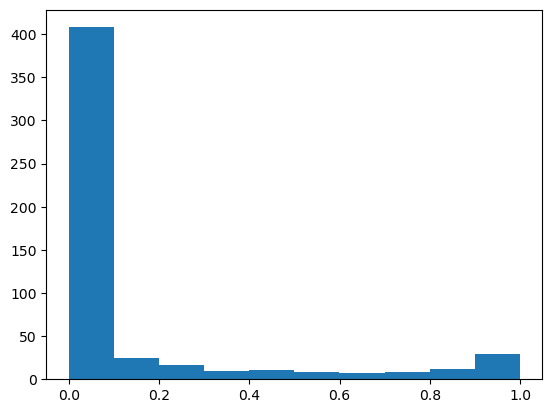

In [41]:
default_hist = plt.hist(default_run['goodSrc']['reliability'])

In [42]:
reliability_table = pd.DataFrame()
reliability_table['reliability'] = np.around(default_hist[1][:-1], 3)
reliability_table[default_run['run_name']] = default_hist[0]
# reliability_table[test_run['run_name']] = test_hist[0]

In [43]:
reliability_table

,reliability,APDB
0,0.000,408.0
1,0.100,25.0
2,0.200,17.0
3,0.300,10.0
4,0.400,11.0
5,0.500,9.0
6,0.599,7.0
7,0.699,9.0
8,0.799,12.0
9,0.899,29.0


In [44]:
print(default_hist[1][5])
print(np.sum(default_hist[0][5:]))
# print(np.sum(test_hist[0][5:]))

0.4995737874099646
66.0


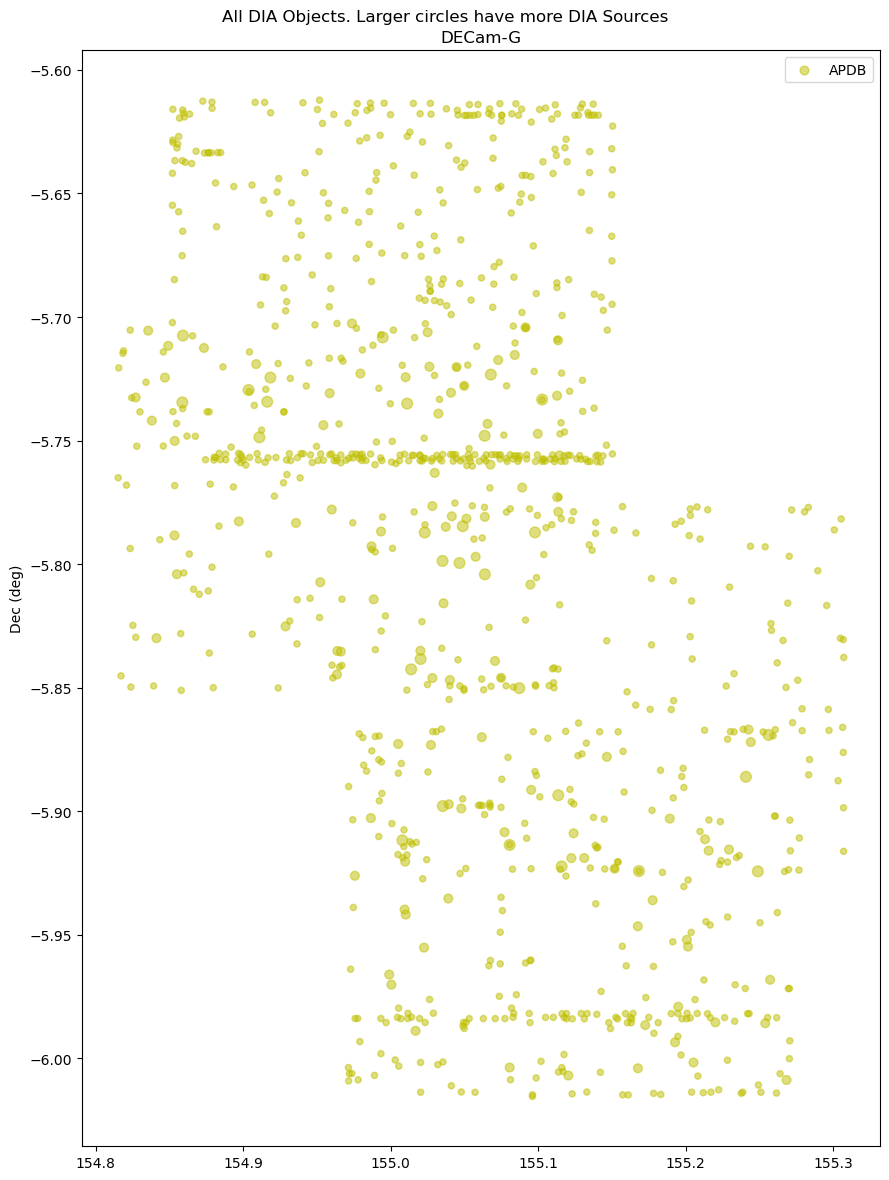

In [45]:
nSrc = 0  # threshold for which DIA Objects to plot (only those with > nSrc constituent DIA Sources)

fig, ax = plt.subplots(1, 1, figsize=(9, 12), sharex=True, sharey=True)

fig.suptitle('All DIA Objects. Larger circles have more DIA Sources')

for i_run, run_dict in enumerate([default_run]):

#     xlim = [149.7, 149.5]
#     ylim = [2.7, 2.9]
    #plt.setp(axs, xlim=xlim, ylim=ylim)
    
    goodFilter = (run_dict['objTable']['nDiaSources'] > nSrc)
#     goodFilter = run_dict[]
    
#     axG = axs[i_run]
    ax.set_ylabel('Dec (deg)')
    if i_run==2:
        ax.set_xlabel('RA (deg)')
    if i_run==0:
        ax.set_title('DECam-G')
    
    colorList = ['y', 'k', 'r']
    markerList = ['o', '+', 'x']

    ax.scatter(run_dict['objTable'].loc[goodFilter, 'ra'],
               run_dict['objTable'].loc[goodFilter, 'dec'],
               s=run_dict['objTable'].loc[goodFilter, 'nDiaSources']*20, 
               c=colorList[i_run], marker=markerList[i_run], alpha=0.5,
               label=run_dict['run_name'])
    ax.legend(loc='upper right')
#     axR.legend(loc='upper right')
plt.tight_layout()

# Load catalog diaSources

Make sure to remove the sky sources first!

In [107]:
butler = default_run['butler']
diaSources = []
visit_list = []
ccd_list = []
for dataId in butler.registry.queryDatasets("goodSeeingDiff_diaSrc"):
    srcCat = butler.get(dataId)
    srcCat = srcCat[~srcCat["sky_source"]]
    diaSources.append(srcCat.copy(deep=True))
    visit_list.append(dataId.dataId['visit'])
    ccd_list.append(dataId.dataId['detector'])

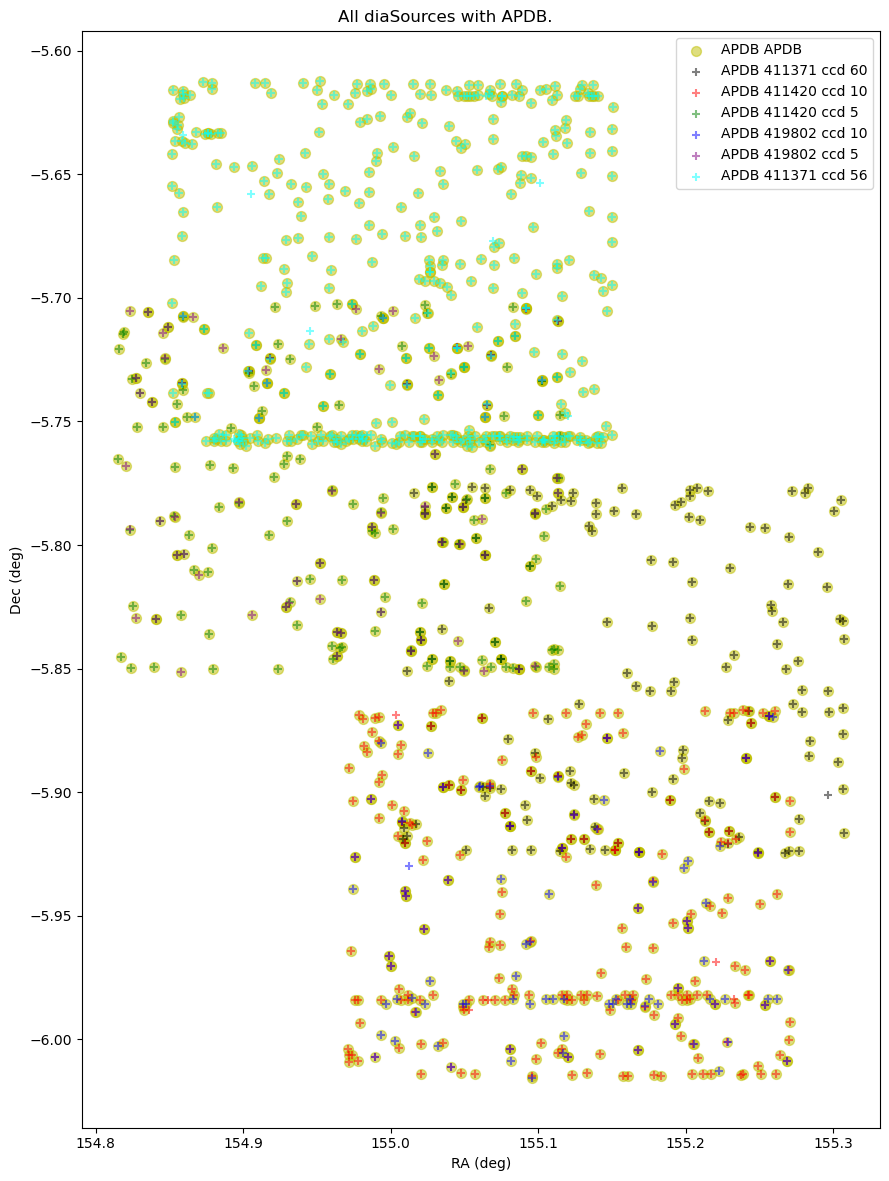

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9, 12), sharex=True, sharey=True)

run_dict = default_run
run_cat = diaSources
visit_list = visit_list
ccd_list = ccd_list
fig.suptitle(f'All diaSources with {run_dict["run_name"]}.')
ax.set_ylabel('Dec (deg)')

colorList = ['y', 'k', 'r', 'g', 'blue', 'purple', 'cyan']
markerList = ['o', '+']

i_run = 0

ax.scatter(run_dict['srcTable']['ra'],
           run_dict['srcTable']['dec'],
           s=50, 
           c=colorList[i_run], marker=markerList[i_run], alpha=0.5,
           label=run_dict['run_name'] + " APDB")
ax.legend(loc='upper right')

i_run = 1
for i, diaCat in enumerate(run_cat):
    ax.scatter(np.rad2deg(diaCat["coord_ra"]),
               np.rad2deg(diaCat["coord_dec"]),
               s=40, 
               c=colorList[i_run + i], marker=markerList[i_run], alpha=0.5,
               label=f"{run_dict['run_name']} {visit_list[i]} ccd {ccd_list[i]}")
    ax.legend(loc='upper right')
ax.set_xlabel('RA (deg)')
#     axR.legend(loc='upper right')
plt.tight_layout()

# Investigate missing APDB sources

Modify the compare_sources tool to use a source catalog

Load the pandas dataframe that is the output of `transformDiaSourceCatalog`

In [106]:
# butler = default_run['butler']
diaSourcesTrans = []
visitTrans_list = []
ccdTrans_list = []
for dataId in butler.registry.queryDatasets("goodSeeingDiff_diaSrcTable"):
    srcCat = butler.get(dataId)
    diaSourcesTrans.append(srcCat)
    visitTrans_list.append(dataId.dataId['visit'])
    ccdTrans_list.append(dataId.dataId['detector'])

Load the output catalog from association

In [122]:
diaSourcesAssoc = []
visitAssoc_list = []
ccdAssoc_list = []
for dataId in butler.registry.queryDatasets("goodSeeingDiff_assocDiaSrc"):
    srcCat = butler.get(dataId)
    diaSourcesAssoc.append(srcCat)
    visitAssoc_list.append(dataId.dataId['visit'])
    ccdAssoc_list.append(dataId.dataId['detector'])


Load the catalog of filtered long trailed sources

In [132]:
diaSourcesLong = []
visitLong_list = []
ccdLong_list = []
for dataId in butler.registry.queryDatasets("goodSeeingDiff_longTrailedSrc"):
    srcCat = butler.get(dataId)
    diaSourcesLong.append(srcCat)
    visitLong_list.append(dataId.dataId['visit'])
    ccdLong_list.append(dataId.dataId['detector'])

Check the ordering of ccds and visits in each list of catalogs, since that may have been loaded in different orders

In [133]:
ccdLong_list

[60, 56, 5, 10, 10, 5]

In [134]:
visitLong_list

[411371, 411371, 411420, 411420, 419802, 419802]

In [108]:
ccd_list

[60, 10, 5, 10, 5, 56]

In [109]:
ccdTrans_list

[10, 5, 60, 5, 10, 56]

In [110]:
visit_list

[411371, 411420, 411420, 419802, 419802, 411371]

In [111]:
visitTrans_list

[419802, 419802, 411371, 411420, 411420, 411371]

Define a simple spatial matching routine

In [48]:
import astropy

In [49]:
apdb_sc = astropy.coordinates.SkyCoord(run_dict['srcTable']['ra'], run_dict['srcTable']['dec'], unit='deg')

In [70]:
def match_spatial_diaSrc_apdb(apdb_sc, diaCat, max_sep=0.01*astropy.units.arcsec):
    diaSrc_sc = astropy.coordinates.SkyCoord(diaCat["coord_ra"], diaCat["coord_dec"], unit='rad')
    idx, d2d, d3d = astropy.coordinates.match_coordinates_sky(diaSrc_sc, apdb_sc)
    inds = d2d > max_sep
    result = diaCat[inds]
    return result.copy(deep=True).asAstropy()

In [71]:
apdbCat = run_dict['srcTable']

In [73]:
apdbCat.diaSourceId.values

array([88341369835225664, 88341369835225665, 88341369835225666, ...,
       90151814514606290, 90151814514606291, 90151814514606292])

We have diaSource IDs in each catalog, so for matching we can just filter on ID!

In [95]:
def match_id_diaSrc_apdb(apdbCat, diaCat):
    apdb_id = apdbCat.diaSourceId.values
    diaCat_id = diaCat["id"]
    ids = np.setdiff1d(diaCat_id, apdb_id)
    diaCat_A = diaCat.asAstropy()
    indx = np.zeros(len(diaCat), dtype='bool')
    for i,src in enumerate(diaCat_A):
        indx[i] = src['id'] in ids
    cat = diaCat_A[indx]
    return cat

In [112]:
src_missing = match_id_diaSrc_apdb(apdbCat, diaSources[0])

In [129]:
src_missing['base_NaiveCentroid_flag'].dtype == 'bool'

True

Find the flags that are set for all of the missing sources from one visit

In [131]:
for col in src_missing.colnames:
    single_col = src_missing[col]
    if single_col.dtype == 'bool':
        if np.all(single_col):
            print(col)

base_SdssShape_flag
base_SdssShape_flag_unweighted
ext_shapeHSM_HsmSourceMoments_flag
base_GaussianFlux_flag_badShape
slot_Shape_flag
base_GaussianFlux_flag
base_PixelFlags_flag_streakCenter
base_PixelFlags_flag_streakCenterAll
base_PixelFlags_flag_streak
ext_trailedSources_Naive_flag_edge


# That's the answer!
All of the missing sources have the streak flag set. These are probably all diaSources that were flagged as long trailed sources, and removed. To check, we have the catalog of long trailed sources, and can verify that these are exactly the same as the missing sources.

In [136]:
diaSourcesLong[0]

,diaSourceId,ccdVisitId,band,diaObjectId,ssObjectId,parentDiaSourceId,midpointMjdTai,bboxSize,time_processed,flags,...,dipoleNdata,scienceFlux,scienceFluxErr,ixx,iyy,ixy,ixxPSF,iyyPSF,ixyPSF,reliability
0,88341378425159965,41137160,g,0,0,0,57071.227994,23,2024-01-12 21:00:46.498060,947912704,...,0,4988.342066,122.416148,NaN,NaN,NaN,0.132038,-0.005608,-0.005608,4.212776e-04
1,88341378425160037,41137160,g,0,0,0,57071.227994,70,2024-01-12 21:00:46.498060,947913500,...,0,318149.084589,619.252243,NaN,NaN,NaN,0.132083,-0.005610,-0.005610,3.540367e-08
2,88341378425160078,41137160,g,0,0,0,57071.227994,27,2024-01-12 21:00:46.498060,947912704,...,0,16188.922501,161.247638,NaN,NaN,NaN,0.132047,-0.005608,-0.005608,4.212776e-04
3,88341378425160113,41137160,g,0,0,0,57071.227994,29,2024-01-12 21:00:46.498060,947912704,...,2349,403375.750836,828.049466,NaN,NaN,NaN,0.132040,-0.005608,-0.005608,2.771977e-04


## Part of the investigation that was ultimately not needed continues below, included for completeness

In [117]:
diaSourcesTrans[2].asAstropy()

,diaSourceId,ccdVisitId,band,diaObjectId,ssObjectId,parentDiaSourceId,midpointMjdTai,bboxSize,time_processed,flags,...,dipoleNdata,scienceFlux,scienceFluxErr,ixx,iyy,ixy,ixxPSF,iyyPSF,ixyPSF,reliability
0,88341378425159953,41137160,g,0,0,0,57071.227994,34,2024-01-12 21:00:46.498060,819595724,...,2673,63292.605960,282.530155,NaN,NaN,NaN,0.132190,-0.005614,-0.005614,0.000421
1,88341378425159954,41137160,g,0,0,0,57071.227994,15,2024-01-12 21:00:46.498060,14289352,...,0,108.934506,213.904494,NaN,NaN,NaN,0.132195,-0.005615,-0.005615,0.000421
2,88341378425159955,41137160,g,0,0,0,57071.227994,11,2024-01-12 21:00:46.498060,8391112,...,0,180.872456,209.085320,NaN,NaN,NaN,0.132190,-0.005614,-0.005614,0.000421
3,88341378425159956,41137160,g,0,0,0,57071.227994,19,2024-01-12 21:00:46.498060,8389064,...,0,114.854889,213.920668,NaN,NaN,NaN,0.132194,-0.005615,-0.005615,0.000421
4,88341378425159957,41137160,g,0,0,0,57071.227994,11,2024-01-12 21:00:46.498060,8388608,...,0,838.369249,122.094595,NaN,NaN,NaN,0.132138,-0.005612,-0.005612,0.000421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,88341378425160121,41137160,g,0,0,0,57071.227994,35,2024-01-12 21:00:46.498060,14289356,...,0,315.068704,201.633843,NaN,NaN,NaN,0.132054,-0.005609,-0.005609,0.000421
169,88341378425160122,41137160,g,0,0,0,57071.227994,41,2024-01-12 21:00:46.498060,819595724,...,0,547.347536,195.148173,NaN,NaN,NaN,0.132066,-0.005609,-0.005609,0.000421
170,88341378425160123,41137160,g,0,0,0,57071.227994,15,2024-01-12 21:00:46.498060,14387660,...,0,28.750043,203.923948,NaN,NaN,NaN,0.132039,-0.005608,-0.005608,0.000421
171,88341378425160124,41137160,g,0,0,0,57071.227994,17,2024-01-12 21:00:46.498060,14387660,...,0,11.582808,198.663314,NaN,NaN,NaN,0.132066,-0.005609,-0.005609,0.000421


In [ ]:
def match_id_diaSrc_dataframe(df, diaCat):
    apdb_id = df.diaSourceId.values
    diaCat_id = diaCat["id"]
    ids = np.setdiff1d(diaCat_id, apdb_id)
    diaCat_A = diaCat.asAstropy()
    indx = np.zeros(len(diaCat), dtype='bool')
    for i,src in enumerate(diaCat_A):
        indx[i] = src['id'] in ids
    cat = diaCat_A[indx]
    return cat

In [120]:
len(diaSourcesTrans[2])

173

In [121]:
len(diaSources[0])

173

In [118]:
src_missing2 = match_id_diaSrc_apdb(diaSourcesTrans[2], diaSources[0])

In [119]:
src_missing2

id,coord_ra,coord_dec,parent,coord_raErr,coord_decErr,coord_ra_dec_Cov,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_near_edge,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,ext_trailedSources_Naive_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,base_SdssShape_yy,base_SdssShape_xy,base_SdssShape_xxErr,base_SdssShape_yyErr,base_SdssShape_xyErr,base_SdssShape_x,base_SdssShape_y,base_SdssShape_instFlux,base_SdssShape_instFluxErr,base_SdssShape_psf_xx,base_SdssShape_psf_yy,base_SdssShape_psf_xy,base_SdssShape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,base_SdssShape_flag,base_SdssShape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_SdssShape_flag_shift,base_SdssShape_flag_maxIter,base_SdssShape_flag_psf,ext_shapeHSM_HsmPsfMoments_flag,slot_PsfShape_flag,ext_shapeHSM_HsmPsfMoments_flag_no_pixels,slot_PsfShape_flag_no_pixels,ext_shapeHSM_HsmPsfMoments_flag_not_contained,slot_PsfShape_flag_not_contained,ext_shapeHSM_HsmPsfMoments_flag_parent_source,slot_PsfShape_flag_parent_source,ext_shapeHSM_HsmPsfMoments_flag_galsim,slot_PsfShape_flag_galsim,ext_shapeHSM_HsmPsfMoments_flag_invalid_param,slot_PsfShape_flag_invalid_param,ext_shapeHSM_HsmPsfMoments_flag_edge,slot_PsfShape_flag_edge,ext_shapeHSM_HsmPsfMoments_flag_no_psf,slot_PsfShape_flag_no_psf,ext_shapeHSM_HsmPsfMoments_x,slot_PsfShape_x,ext_shapeHSM_HsmPsfMoments_y,slot_PsfShape_y,ext_shapeHSM_HsmPsfMoments_xx,slot_PsfShape_xx,ext_shapeHSM_HsmPsfMoments_yy,slot_PsfShape_yy,ext_shapeHSM_HsmPsfMoments_xy,slot_PsfShape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_invalid_param,base_GaussianFlux_flag_badShape_invalid_param,slot_Shape_flag_invalid_param,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_fla

So there are no sources missing after transforming the catalog to a dataframe (and separately filtering sky sources from each)

In [76]:
diaCat = diaSources[0]

In [80]:
diaCat[diaCat["id"] == 88341378425159965]

<class 'lsst.afw.table.SourceCatalog'>
        id             coord_ra          coord_dec       parent coord_raErr ... ip_diffim_forced_PsfFlux_flag_noGoodPixels ip_diffim_forced_PsfFlux_flag_edge refMatchId srcMatchId sky_source
                         rad                rad                     rad     ...                                                                                                               
----------------- ----------------- -------------------- ------ ----------- ... ------------------------------------------ ---------------------------------- ---------- ---------- ----------
88341378425159965 2.705667916152141 -0.10095751640710009      0         nan ...                                      False                              False          0          0      False

In [69]:
match_diaSrc_apdb(apdb_sc, diaSources[0])

id,coord_ra,coord_dec,parent,coord_raErr,coord_decErr,coord_ra_dec_Cov,flags_negative,base_NaiveCentroid_x,base_NaiveCentroid_y,base_NaiveCentroid_flag,base_NaiveCentroid_flag_noCounts,base_NaiveCentroid_flag_edge,base_NaiveCentroid_flag_resetToPeak,base_PeakCentroid_x,base_PeakCentroid_y,base_PeakCentroid_flag,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_SdssCentroid_flag,base_SdssCentroid_flag_edge,base_SdssCentroid_flag_noSecondDerivative,base_SdssCentroid_flag_almostNoSecondDerivative,base_SdssCentroid_flag_notAtMaximum,base_SdssCentroid_flag_near_edge,base_SdssCentroid_flag_resetToPeak,base_SdssCentroid_flag_badError,ip_diffim_NaiveDipoleCentroid_flag,base_CircularApertureFlux_flag_badCentroid,base_GaussianFlux_flag_badCentroid,base_NaiveCentroid_flag_badInitialCentroid,base_PeakLikelihoodFlux_flag_badCentroid,base_PsfFlux_flag_badCentroid,base_SdssCentroid_flag_badInitialCentroid,base_SdssShape_flag_badCentroid,ext_shapeHSM_HsmPsfMoments_flag_badCentroid,ext_shapeHSM_HsmSourceMoments_flag_badCentroid,ext_trailedSources_Naive_flag_badCentroid,slot_Centroid_flag,ip_diffim_NaiveDipoleCentroid_pos_flag,slot_Centroid_pos_flag,ip_diffim_NaiveDipoleCentroid_neg_flag,slot_Centroid_neg_flag,ip_diffim_NaiveDipoleCentroid_x,slot_Centroid_x,ip_diffim_NaiveDipoleCentroid_y,slot_Centroid_y,ip_diffim_NaiveDipoleCentroid_xErr,slot_Centroid_xErr,ip_diffim_NaiveDipoleCentroid_yErr,slot_Centroid_yErr,ip_diffim_NaiveDipoleCentroid_pos_x,slot_Centroid_pos_x,ip_diffim_NaiveDipoleCentroid_pos_y,slot_Centroid_pos_y,ip_diffim_NaiveDipoleCentroid_pos_xErr,slot_Centroid_pos_xErr,ip_diffim_NaiveDipoleCentroid_pos_yErr,slot_Centroid_pos_yErr,ip_diffim_NaiveDipoleCentroid_neg_x,slot_Centroid_neg_x,ip_diffim_NaiveDipoleCentroid_neg_y,slot_Centroid_neg_y,ip_diffim_NaiveDipoleCentroid_neg_xErr,slot_Centroid_neg_xErr,ip_diffim_NaiveDipoleCentroid_neg_yErr,slot_Centroid_neg_yErr,base_SdssShape_xx,base_SdssShape_yy,base_SdssShape_xy,base_SdssShape_xxErr,base_SdssShape_yyErr,base_SdssShape_xyErr,base_SdssShape_x,base_SdssShape_y,base_SdssShape_instFlux,base_SdssShape_instFluxErr,base_SdssShape_psf_xx,base_SdssShape_psf_yy,base_SdssShape_psf_xy,base_SdssShape_instFlux_xx_Cov,base_SdssShape_instFlux_yy_Cov,base_SdssShape_instFlux_xy_Cov,base_SdssShape_flag,base_SdssShape_flag_unweightedBad,base_SdssShape_flag_unweighted,base_SdssShape_flag_shift,base_SdssShape_flag_maxIter,base_SdssShape_flag_psf,ext_shapeHSM_HsmPsfMoments_flag,slot_PsfShape_flag,ext_shapeHSM_HsmPsfMoments_flag_no_pixels,slot_PsfShape_flag_no_pixels,ext_shapeHSM_HsmPsfMoments_flag_not_contained,slot_PsfShape_flag_not_contained,ext_shapeHSM_HsmPsfMoments_flag_parent_source,slot_PsfShape_flag_parent_source,ext_shapeHSM_HsmPsfMoments_flag_galsim,slot_PsfShape_flag_galsim,ext_shapeHSM_HsmPsfMoments_flag_invalid_param,slot_PsfShape_flag_invalid_param,ext_shapeHSM_HsmPsfMoments_flag_edge,slot_PsfShape_flag_edge,ext_shapeHSM_HsmPsfMoments_flag_no_psf,slot_PsfShape_flag_no_psf,ext_shapeHSM_HsmPsfMoments_x,slot_PsfShape_x,ext_shapeHSM_HsmPsfMoments_y,slot_PsfShape_y,ext_shapeHSM_HsmPsfMoments_xx,slot_PsfShape_xx,ext_shapeHSM_HsmPsfMoments_yy,slot_PsfShape_yy,ext_shapeHSM_HsmPsfMoments_xy,slot_PsfShape_xy,ext_shapeHSM_HsmSourceMoments_flag,base_GaussianFlux_flag_badShape,slot_Shape_flag,ext_shapeHSM_HsmSourceMoments_flag_no_pixels,base_GaussianFlux_flag_badShape_no_pixels,slot_Shape_flag_no_pixels,ext_shapeHSM_HsmSourceMoments_flag_not_contained,base_GaussianFlux_flag_badShape_not_contained,slot_Shape_flag_not_contained,ext_shapeHSM_HsmSourceMoments_flag_parent_source,base_GaussianFlux_flag_badShape_parent_source,slot_Shape_flag_parent_source,ext_shapeHSM_HsmSourceMoments_flag_galsim,base_GaussianFlux_flag_badShape_galsim,slot_Shape_flag_galsim,ext_shapeHSM_HsmSourceMoments_flag_invalid_param,base_GaussianFlux_flag_badShape_invalid_param,slot_Shape_flag_invalid_param,ext_shapeHSM_HsmSourceMoments_flag_edge,base_GaussianFlux_flag_badShape_edge,slot_Shape_fla

In [62]:
diaSrc_sc = astropy.coordinates.SkyCoord(diaSources[3]["coord_ra"], diaSources[3]["coord_dec"], unit='rad')

In [63]:
idx, d2d, d3d = astropy.coordinates.match_coordinates_sky(diaSrc_sc, apdb_sc)

In [64]:
idx

array([1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053,
       1054, 1055, 1056, 1057,  803, 1058, 1059, 1060, 1061, 1062, 1063,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085,
       1086, 1087, 1088, 1089, 1090, 1091,  861, 1092, 1093, 1094, 1095,
       1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,
       1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116,
       1117, 1118, 1119, 1120, 1121,  933, 1122, 1123, 1124, 1125, 1126,
       1127, 1128, 1129, 1130, 1131])

In [65]:
d2d

<Angle [2.53078662e-14, 2.53084557e-14, 0.00000000e+00, 0.00000000e+00,
        7.95138670e-16, 7.95138670e-16, 2.53057169e-14, 7.95138670e-16,
        7.95138670e-16, 0.00000000e+00, 7.95138670e-16, 0.00000000e+00,
        7.95138670e-16, 0.00000000e+00, 0.00000000e+00, 9.42496618e-03,
        7.95138670e-16, 7.95138670e-16, 0.00000000e+00, 0.00000000e+00,
        2.53103752e-14, 7.95138670e-16, 2.53049272e-14, 7.95138670e-16,
        0.00000000e+00, 2.53170194e-14, 2.53057191e-14, 0.00000000e+00,
        0.00000000e+00, 7.95138670e-16, 0.00000000e+00, 2.53205433e-14,
        7.95138670e-16, 7.95138670e-16, 2.53171334e-14, 0.00000000e+00,
        2.53062380e-14, 2.53068324e-14, 7.95138670e-16, 0.00000000e+00,
        7.95138670e-16, 0.00000000e+00, 7.95138670e-16, 7.95138670e-16,
        2.53224312e-14, 2.53086268e-14, 2.53047983e-14, 7.95138670e-16,
        0.00000000e+00, 7.95138670e-16, 7.50034657e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.591764

Most have identically zero separation, but a few have slight to large separation from the nearest matching source. For this measurement, anything that is not exactly zero is suspicious!

# Conclusions
* The check using diaSourceIds confirmed that any separation greater than 0.0 between the position of the diaSource in the catalog and in the APDB is an error. There is no modification of the coordinates during translation.
* Also, long trailed sources are filtered during association (in `diaPipe`) and after translation from the catalog format to a dataframe. The missing sources reported on this ticket were all filtered because they were flagged as long trailed sources.